# Livrable 4_Équipe 13_Traitement du signal :

![](https://hdoc.romainmahieu.fr/uploads/23a87d7f-cb97-4303-b878-898a6e5f096a.png)

BOUCETTA-HERVIEUX Enzo, HEBERT-CREVECOEUR Romane, LAVICE Noan, LIAUZUN Jean, REBEILLEAU-DASSONNEVILLE Lila et SAAS Enzo.

### Sommaire :

* Contexte
* Chaine de transmission 
* Programme python
* Code python
* Conclution

### Contexte :

Une agence de lutte contre la cybercriminalité (AIL3C) a réussi à localiser une grande organisation de cyberpirate dans une chaine de montagne. Afin de récolter un maximum d’informations, l’agence a envoyé l’espion K57 dans la base, mais dû à des complications il s'est caché dans une salle de conférence vide. Seul problème: il ne peut pas communiquer avec son équipe et fut découvert.
L'agence cherche donc une solution pour pouvoir communiquer à l’intérieur de cette salle qui ne contient qu’un micro ne fonctionnant que lorsque la salle est utilisée. Sachant qu’aucune onde venant de l’extérieur ne peut être reçue dans le bâtiment, l’agence est donc obligée de passer par ce micro.

### Chaine de transmission :

Nous allons dans cette partie présenter la chaine de transmission des informations de l’émission d'un signal à sa réception pour les fichiers écrits, vocaux et volumineux. Nous expliquerons cette chaine de transmission et donnerons un exemple concret. 

> S.N = signal numerique : Un signal numérique est un type de signal qui représente des informations sous forme binaire. En termes plus simples, il convertit des données physiques en code binaire, composé de 0 et de 1, qu'un ordinateur peut comprendre et traiter.

> S.A = signal analogique : Un signal analogique est un signal continu au cours du temps et en amplitude, ce qui signifie qu’il peut prendre toutes les valeurs possibles. Ce signal est une onde continue qui ne cesse de changer au cours d’une période de temps.

#### Pour un fichier son :

Lors de la génération et de l'émission d'un message vocal, un signal analogique à 18 kHz est produit par le pad. Nous avons choisi une frequence à 18kHz afin d'être sûr que le micro capte le son mais pas les Hommes (en effet après 24 ans l'oreille humaine n'entend plus les sons de plus de 18 kHz) Ce signal est modulé en AM (modulation d’amplitude) afin d’encoder les données.

```mermaid
flowchart LR
  A{Pad Agent} -.->B(fichier son en S.N)
  B-->C(Signal a 18Khz)
  C-->|Modulation AM|D(S.A)
  D-->E(Réception par le micro)
  E-->F(transmission réseau)

  style A fill:lightgrey,stroke:red 
```
L'ordinateur espion capte le signal analogique, ce signal est démodulé pour extraire les données initiales et les reconstruire sous leur forme originale.

```mermaid
flowchart LR
  A{Ordinateur Espion} -.->B(Réception du S.A)
  B-->C(filtrage)
  C -->|Démodulation AM|D(S.N)
  D-->E(Fichier son)
  

  style A fill:lightgrey,stroke:red 
```

#### Pour un fichier texte :

Le pad génère un message écrit et prépare son envoi sur le réseau. Avant la transmission, il est encodé et modulé.

```mermaid
flowchart LR
  A{Pad Agent} -.-> B(fichier texte)
  B --> C(table ASCII)
  C --> D(binaire)
  D -->|ecodage manchester|E(S.N)
  E-->|modulation ASK|F(S.A)
  F -->G(micro)
  G(transmission réseau)
  style A fill:lightgrey,stroke:red 
```

L'ordinateur espion capte  et reconstruit le fichier en vérifiant son intégrité avant de le décoder dans son format original.

```mermaid
flowchart LR
  A{Ordinateur Espion} -.->B(Réception)
  B-->C(filtrage)
  C-->D(S.A)
  D-->|démodulation ASK|E(S.N)
  E-->|désencodage|F(binaire)
  F-->G(table ASCII)
  G-->H(fichier texte)

  style A fill:lightgrey,stroke:red 
```

#### Pour un fichier Volumineux :

Le pad génère un fichier texte volumineux qui est compressé, encodé et fragmenté avant d’être envoyé sur le réseau.

```mermaid
flowchart LR
  A{Pad Agent} -.-> B(Fichier Volumineux)
  B --> C(Table ASCII)
  C --> D(binaire)
  D -->|ecodage manchester|E(S.N)
  E-->|modulation ASK|F(S.A)
  F -->G(Compression)
  G--> H(Fragmentation)
  H -->|Envoie des paquets| I(micro)
  I-->J(transmission réseau)

  style A fill:lightgrey,stroke:red 
```
L'ordinateur espion capte les paquets envoyés en réseau et reconstitue le fichier après décompression et décodage.

```mermaid
flowchart LR
  A{Ordinateur Espion} -.-> B(Réception)
  B-->C(filtrage)
  C--> D(Reconstitution des paquets)
  D--> E(Décompréssion)
  E-->F(S.A)
  F-->|démodulation ASK|G(S.N)
  G-->|désencodage|H(binaire)
  H-->I(table ASCII)
  I-->J(fichier volumineux)
  style A fill:lightgrey,stroke:red 
```
#### Exemple :

Par exemple pour l'encodage ASCII : prenons le caractère A, celui ci en ASCII vaut 65, le 65 sera transfomé en binaire ce qui donne : 01000001

Et pour le décodage avec l'exemple du A toujours il suffit de faire le chemin inverse, 01000001 vaut 65 et se transforme grace à la table ASCII en A

# Code python :

#### Partie émetteur :

Cette partie du code permet d'envoyer un message en nous demandant si l'on veut transmettre un message écrit (en spécifiant si l'on écrit nous même le message ou si l'on veut transmettre un fichier depuis son pc), binaire ou un son.

Une fois le type de fichier choisi, le code permettra de transformer le message en ASCII, puis en Binaire. Le message ainsi codé (ou non en fonction du type de fichier) est prêt pour être modulé et transformé en signal analogique pour pouvoir le transmettre.
 

In [1855]:
#TOUT LES IMPORTS ET INSTALLATION
!pip install sounddevice
!pip install crcmod
!pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import write, read
import binascii
from scipy.signal import periodogram
import os
import soundfile as sf

# EMISSION
## MESSAGE -> BINAIRE

In [1857]:
def Message ():
    type_fichier = int(input("Veuillez selectionner le  type de fichier :\n 1)Message texte\n 2)Fichier texte\n 3)Fichier Son\n"))

    #SI C'EST UN MESSAGE
    if type_fichier == 1 :
        message = input("Veuilez entrer votre message : entre 5 et 10 caractères.   ")
        #VERIFIE SI LE MESSAGE CONTIENT ENTRE 5 A 10 CARACTERES
        assert len(message) >= 5 and len(message) <= 10, "Votre message doit contenir entre 5 et 10 caractères"
        
        binaire = ' '.join(format(ord(car), '08b') for car in message)   #TRANSFORME LE MESSAGE EN BINAIRE AVEC LA TABLE ASCII
        return binaire

    
    #SI C'EST UN FICHIER TXT
    if type_fichier == 2 : 
        nom_fichier = input("Entrez le nom du fichier (sans l'extension)\n")    
        file = open(f"{nom_fichier}.txt", "r") 
        fichier = file.read() 
        
        binaire = ' '.join(format(ord(car), '08b') for car in fichier)  #TRANSFORME LE FICHIER EN BINAIRE AVEC LA TABLE ASCII
        return binaire

    #SI C'EST UN FICHIER AUDIO
    if type_fichier == 3 :
       if type_fichier == 3:
        chemin_fichier = input("Entrez le chemin du fichier audio (.wav) : ")
        data, Fe = sf.read(chemin_fichier)  # Charger les données audio (échantillons et fréquence d'échantillonnage)
        
        # Convertir les données audio en binaire
        # Pour ce faire, on transforme chaque échantillon en une chaîne binaire
        binaire_audio = ' '.join(format(int(echant * 32767), '016b') for echant in data.flatten())  
        return binaire_audio

bits = Message()
print ("Le message en binaire est : ", bits)

Veuillez selectionner le  type de fichier :
 1)Message texte
 2)Fichier texte
 3)Fichier Son
 1
Veuilez entrer votre message : entre 5 et 10 caractères.    aidez moi


Le message en binaire est :  01100001 01101001 01100100 01100101 01111010 00100000 01101101 01101111 01101001


## ENCODAGE MANCHESTER

In [1860]:
def enco_manchester(bits):
    manchester = []   #STOCK LE RESULTAT DE L'ENCODAGE  
    
    for i in bits:    #PARCOURS LE MESSAGE BINAIRE
        if i == '1':  #SI i = 1, ON AJOUTE DANS L'ORDRE 1 PUIS 0
            manchester.append(1)
            manchester.append(-1)
        elif i == '0':  #SI i = 0, ON AJOUTE DANS L'ORDRE 0 PUIS 1
            manchester.append(-1)
            manchester.append(1)
            
    return manchester

encodage_manchester = enco_manchester(bits)
print("Codage Manchester :", encodage_manchester)

Codage Manchester : [-1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1]


## MODULATION ASK

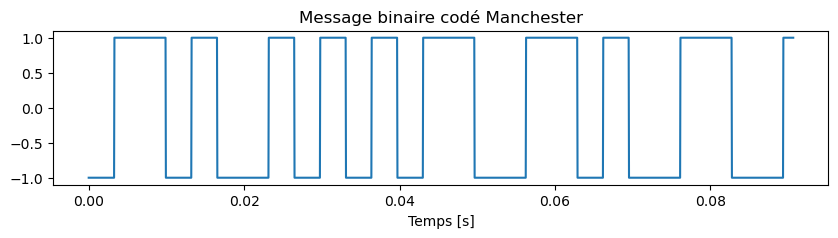

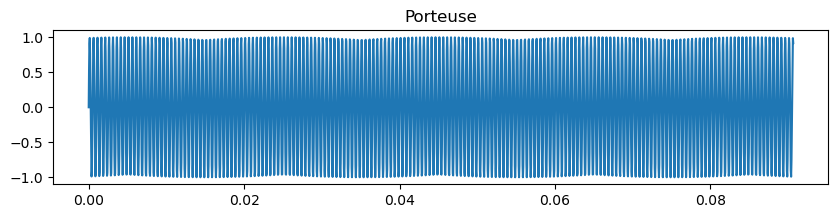

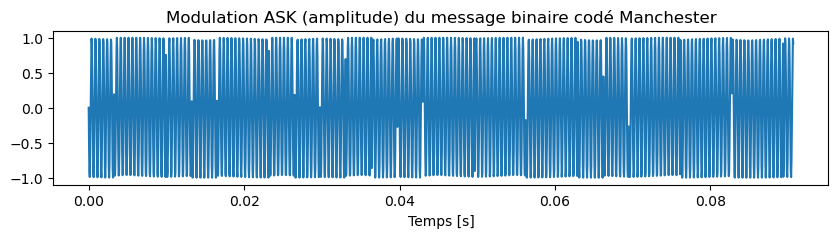

In [1863]:
#VARIABLES 
baud = 300                            # DEBIT (bit/s)
Fe = 22_050                            # FREQUENCE D'ECHANTILLONAGE
Nbits = len(encodage_manchester)      # NOMBRE DE BITS 
Ns = int(Fe/baud)                     # Nombre de symboles par bit (Fréq d'echan / Débit binaire)
N = int(Nbits * Ns)                   # Nombre de symboles total à envoyer (Nombre de symboles par bit * Nombre de bits)
#VECTEUR TEMPS
t = np.arange (0, N/Fe, 1/Fe)  

#MSG BINAIRE EST DUPLIQUER Ns FOIS POUR AVOIR LA MEME TAILLE QUE LE VECTEUR TEMPS
msg_bit_duplique= np.repeat(encodage_manchester, Ns)

#GENERATION DE LA PORTEUSE
Ap = 1
Fp = 2_000       #FREQUENCE DE LA PORTEUSE
Porteuse = Ap * np.sin(2 * np.pi * Fp * t)

#CALCUL DE LA MODULATION ASK
ASK = msg_bit_duplique * Porteuse
#print("Signal modulé : ", ASK)

plt.figure (figsize = (10,2))   
plt.plot(t[0:2_000],msg_bit_duplique[0:2_000])  #AFFICHAGE D'UNE PARTIE DES ECHANTILLONS (pour que ca soit lisible)
plt.xlabel("Temps [s]")
plt.title("Message binaire codé Manchester")

plt.figure (figsize = (10,2))
plt.plot(t[0:2_000],Porteuse[0:2_000])
plt.title("Porteuse")

plt.figure (figsize = (10,2))
plt.plot(t[0:2_000],ASK[0:2_000])
plt.xlabel("Temps [s]")
plt.title("Modulation ASK (amplitude) du message binaire codé Manchester")

plt.show()  

# SIMULATION DU SIGNAL

In [1866]:
#CONSEIL : NE MONTEZ PAS TROP LE SON

sd.play(ASK, Fe)
sd.wait()
#sd.play(FSK, Fe)

# RECEPTION

#### Partie récepteur :

Cette partie du code permet de recevoir le message transmis dans la partie précédente.

Une fois le type de fichier choisi, le code permettra de recevoir signal analogique afin de le démoduler et de le décoder pour ensuite pouvoir lire ou écouter le message.


## DEMODULATION ASK

In [1870]:
#INITIALISE UNE VARIABLE PRODUIT POUR L'INTEGRATION
Produit = ASK * Porteuse

#INTEGRATION PAR PARTIE
res = [int(np.trapz(Produit[i:i+Ns])) for i in range(0, N, Ns)] 
print("tableau integration (Res):\n ", res)

#DEMODULATION
msg_demodule_ASK = []
for ii in range (len(res)):
    if res[ii] > 0 :
            msg_demodule_ASK.append(1) 
    if res[ii]  <= 0 :
            msg_demodule_ASK.append(-1) 
print("\nSignal démodulé (msg demodule ASK):\n " , msg_demodule_ASK)


#CALCUL DES ERREURS
Erreur = []
for k in range(len(encodage_manchester)):
    if encodage_manchester[k]== msg_demodule_ASK[k]: #SI LA VALEUR A L'INDICE i, AVANT LA MODULATION ET APRES ALORS IL N'Y A PAS D'ERREUR DONC TRUE
        Erreur.append(True)
    else : 
        Erreur.append(False) #SINON FALSE
print("\nErreur de reception :\n", Erreur)

#CORRECTEUR D'ERREURS
for i in range(len(Erreur)):
    if Erreur[i] == False :  #SI UNE ERREUR EST DETECTER
        msg_demodule_ASK[i] = M[i]  #ON CORRIGE EN REMPLACANT PAR LE BON BITS
        print("Correction du bit ", i ," : " , msg_demodule_ASK[i]  ,"→", encodage_manchester[i])
print("\nMessage binaire corrigé   :\n ", msg_demodule_ASK)

tableau integration (Res):
  [-35, 36, 36, -35, 35, -35, -36, 36, -35, 35, -36, 36, -35, 35, 36, -36, -35, 35, 36, -36, 35, -35, -36, 36, 35, -35, -36, 36, -35, 35, 36, -36, -35, 35, 36, -36, 35, -35, -36, 36, -36, 35, 35, -36, -36, 35, -35, 36, -36, 35, 35, -36, 36, -35, -35, 36, -36, 35, 35, -36, -36, 35, 35, -36, -36, 35, 35, -36, 36, -35, 35, -36, 36, -36, -35, 35, 36, -36, -35, 35, -36, 36, -35, 35, 36, -36, -35, 35, -36, 36, -35, 35, -36, 36, -35, 35, -36, 36, 35, -35, 36, -36, -35, 35, 36, -36, 36, -35, -35, 36, 36, -35, -35, 36, 36, -35, 35, -36, -36, 35, 35, -36, 36, -35, 35, -36, 36, -35, -35, 36, 36, -35, 35, -36, -36, 35, 35, -36, -36, 35, -35, 35, 36, -36]

Signal démodulé (msg demodule ASK):
  [-1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1

## DECODAGE MANCHESTER

In [1873]:
def deco_manchester(bits):
    manchester = ''        #STOCK LE RESULTAT DU DECODAGE
    for i in range(0,len(bits),2):  
        if (bits[i] == 1 and bits[i+1] == -1):   
            manchester += '1'      #SI ON A 1 PUIS 0, ON AJOUTE 0
        if (bits[i] == -1 and bits[i+1] == 1):
            manchester += '0'      #SI ON A 0 PUIS 1, ON AJOUTE 1
    return manchester

print(msg_demodule_ASK)
decodage_manchester = deco_manchester(msg_demodule_ASK)
print("Décodage Manchester : ", decodage_manchester)     

[-1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1]
Décodage Manchester :  011000010110100101100100011001010111101000100000011011010110111101101001


## BINAIRE -> MESSAGE

In [1876]:
def binaire_vers_texte(binaire):
    #SEPARE LA CHAINE BINAIRE EN MORCEAU DE 8 BITS
    octets = [binaire[i:i+8] for i in range(0, len(binaire), 8)]
    #CONVERTIT CHAQUE MORCEAU (OCTET) EN CARACTERE ASCII
    texte = ''.join(chr(int(octet, 2)) for octet in octets)
    print( "Le message est : ", texte)
    
binaire_vers_texte(decodage_manchester)

Le message est :  aidez moi


## MODULATION FSK

In [1879]:
M_FSK = encodage_manchester
# Génération du message binaire dupliqué
M_duplique_FSK = np.repeat(M_FSK, Ns)

# Génération du vecteur temps
t_FSK = np.arange(0, len(M_FSK) * Ns / Fe, 1 / Fe)

# Définition des porteuses
t_bit = np.arange(0, Ns / Fe, 1 / Fe)  # Vecteur temps pour un seul bit
A1 = 1                                             
A2 = 1                  
f1  = 500
f2  = 1000
P1 = A1 * np.sin(2 * np.pi * f1 * t_bit)
P2 = A2 * np.sin(2 * np.pi * f2 * t_bit)

# Modulation FSK
FSK = np.concatenate([P1 if bit == 1 else P2 for bit in M_FSK])

### Conclusion :

En conclusion, notre code facilite la communication que se soit écrit ou oral entre les deux agents, l'un infiltré dans la base ennemie et l'autre situé au sein de l'agence.